In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('dolarblue.csv')


In [5]:
df.head()


,Fecha,Compra,Venta
0,26-03-2021,"137,00","142,00"
1,25-03-2021,"138,00","143,00"
2,23-03-2021,"138,00","143,00"
3,22-03-2021,"138,00","143,00"
4,22-03-2021,"138,00","143,00"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532 entries, 0 to 4531
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fecha   4532 non-null   object
 1   Compra  4532 non-null   object
 2   Venta   4532 non-null   object
dtypes: object(3)
memory usage: 106.3+ KB


In [7]:
df['date'] = pd.to_datetime(df.Fecha, format='%d-%m-%Y')
df = df.drop(['Fecha','Compra'],1)
df = df[df.date >= '2008-01-01']

In [8]:
df['Venta'] = df.Venta.str.replace(',','.').astype('float')

In [9]:
df = df.groupby('date').agg(usd_ars=('Venta','max')).reset_index()

In [10]:
df

,date,usd_ars
0,2008-01-02,3.17
1,2008-01-03,3.17
2,2008-01-04,3.17
3,2008-01-07,3.18
4,2008-01-08,3.18
...,...,...
3223,2021-03-19,144.00
3224,2021-03-22,144.00
3225,2021-03-23,143.00
3226,2021-03-25,143.00


In [11]:
df['year'] = pd.DatetimeIndex(df['date']).year

<AxesSubplot:xlabel='date', ylabel='usd_ars'>

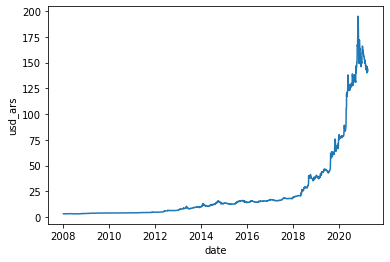

In [12]:
sns.lineplot(data=df, x='date',y='usd_ars')

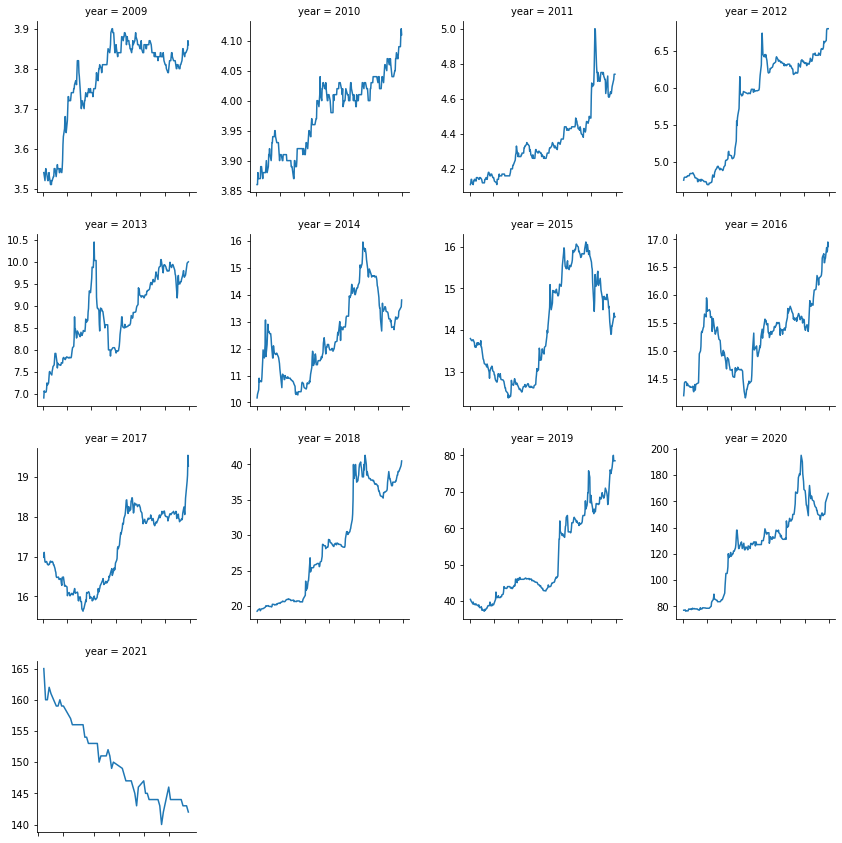

In [13]:
g= sns.FacetGrid(data=df[df.year >= 2009], col='year', sharex=False, sharey=False, col_wrap=4)
g.map_dataframe(sns.lineplot, x="date", y="usd_ars")
g.set(xticklabels=[])

In [103]:
df['fouryear_cycle'] = df.year.apply(lambda x: str((x // 4)*4)+'-'+str((x // 4)*4+4))

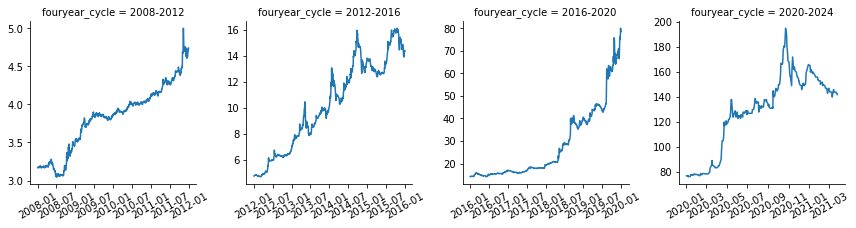

In [104]:
g= sns.FacetGrid(data=df, col='fouryear_cycle', sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x="date", y="usd_ars")
g.set_xticklabels(rotation=30)

In [106]:
temp = df.groupby('fouryear_cycle').agg(first=('date','min')).reset_index()
temp

,fouryear_cycle,first
0,2008-2012,2008-01-02
1,2012-2016,2012-01-03
2,2016-2020,2016-01-04
3,2020-2024,2020-01-02


In [113]:
start_val = pd.merge(df, temp, left_on='date', right_on='first', suffixes=(None,'_y')).loc[:,['date','usd_ars','fouryear_cycle']]
start_val

,date,usd_ars,fouryear_cycle
0,2008-01-02,3.17,2008-2012
1,2012-01-03,4.75,2012-2016
2,2016-01-04,14.20,2016-2020
3,2020-01-02,77.00,2020-2024


In [119]:
temp2 = pd.merge(df, start_val, on='fouryear_cycle', suffixes=(None,'_start')).loc[:,['date','usd_ars','year','fouryear_cycle','usd_ars_start']]
temp2

,date,usd_ars,year,fouryear_cycle,usd_ars_start
0,2008-01-02,3.17,2008,2008-2012,3.17
1,2008-01-03,3.17,2008,2008-2012,3.17
2,2008-01-04,3.17,2008,2008-2012,3.17
3,2008-01-07,3.18,2008,2008-2012,3.17
4,2008-01-08,3.18,2008,2008-2012,3.17
...,...,...,...,...,...
3223,2021-03-19,144.00,2021,2020-2024,77.00
3224,2021-03-22,144.00,2021,2020-2024,77.00
3225,2021-03-23,143.00,2021,2020-2024,77.00
3226,2021-03-25,143.00,2021,2020-2024,77.00


In [120]:
temp2['return'] = temp2.usd_ars/temp2.usd_ars_start
temp2

,date,usd_ars,year,fouryear_cycle,usd_ars_start,return
0,2008-01-02,3.17,2008,2008-2012,3.17,1.000000
1,2008-01-03,3.17,2008,2008-2012,3.17,1.000000
2,2008-01-04,3.17,2008,2008-2012,3.17,1.000000
3,2008-01-07,3.18,2008,2008-2012,3.17,1.003155
4,2008-01-08,3.18,2008,2008-2012,3.17,1.003155
...,...,...,...,...,...,...
3223,2021-03-19,144.00,2021,2020-2024,77.00,1.870130
3224,2021-03-22,144.00,2021,2020-2024,77.00,1.870130
3225,2021-03-23,143.00,2021,2020-2024,77.00,1.857143
3226,2021-03-25,143.00,2021,2020-2024,77.00,1.857143


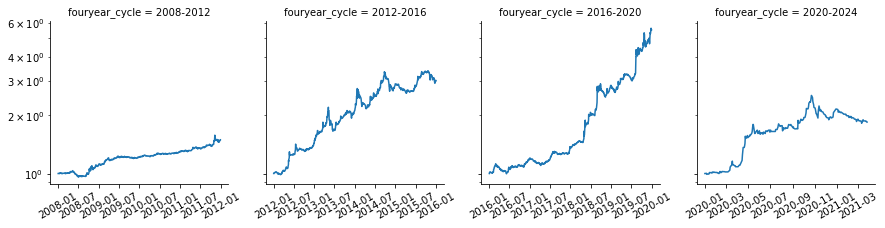

In [125]:
g= sns.FacetGrid(data=temp2, col='fouryear_cycle', sharex=False, sharey=True)
g.map_dataframe(sns.lineplot, x="date", y="return")
g.set_xticklabels(rotation=30)
g.set(yscale='log')

ValueError: Could not interpret value `return` for parameter `y`

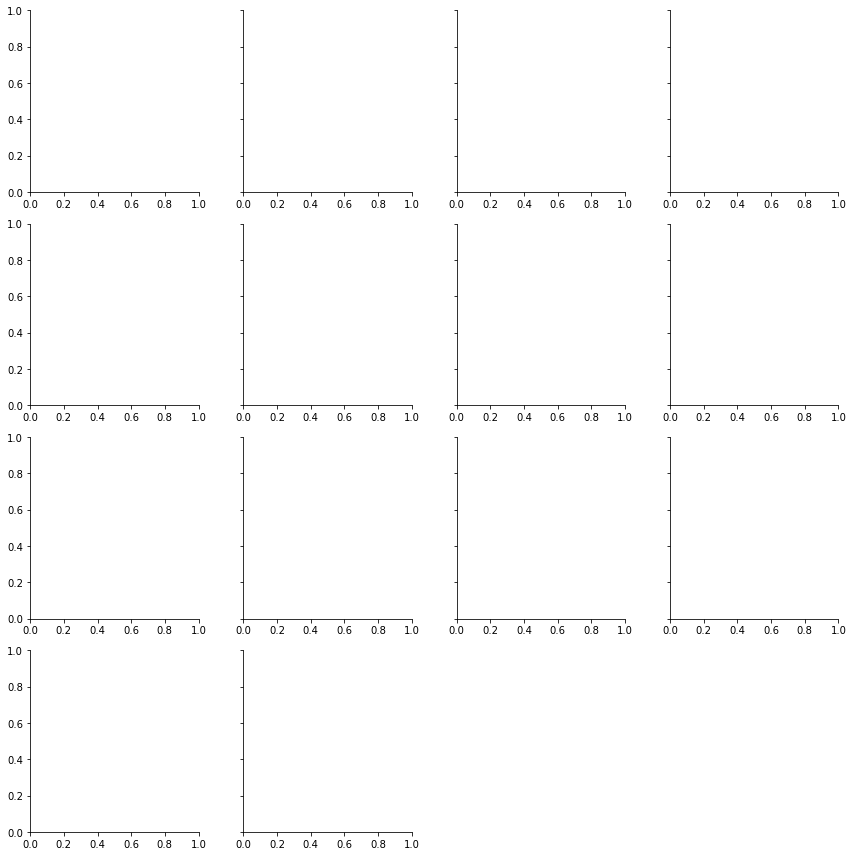

In [133]:
g= sns.FacetGrid(data=df, col='year', sharex=False, sharey=True, col_wrap=4)
g.map_dataframe(sns.lineplot, x="date", y="return")
g.set(yscale='log')
g.set(xticklabels=[])